In [1]:
suppressMessages(source("../config_sing.R"))

## Helper function

**Negative binomial**

In [2]:
fun_rnegbin = function(n, mu, sigma2){
    theta = mu^2 / (sigma2 - mu)
    x = MASS::rnegbin(n, mu, theta)
    return(x)
}

In [3]:
set.seed(123)
for (n in c(100, 1000, 10000, 100000)){
    x = fun_rnegbin(n, 3, 10)
    print(c(n, mean(x), var(x)))
}

[1] 100.000000   2.600000   7.454545
[1] 1000.000000    2.934000    9.967612
[1] 10000.000000     2.953100     9.716872
[1] 100000.00000      3.01060     10.05281


**Mean-Variance relationship**

In [4]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_input_20x.rds"
fpath = file.path(fdiry, fname)

fit_inp20x = readRDS(fpath)
print(class(fit_inp20x))
print(names(fit_inp20x))
print(length(fit_inp20x$x))

[1] "list"
[1] "x" "y"
[1] 734347


In [5]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "lowess_tfx_dmso.rds"
fpath = file.path(fdiry, fname)

fit_dmso = readRDS(fpath)
print(class(fit_dmso))
print(names(fit_dmso))
print(length(fit_dmso$x))

[1] "list"
[1] "x" "y"
[1] 691738


In [22]:
fun_predict = function(fit, x_new){
    y_new = approx(fit$x, fit$y, xout=x_new, ties=mean)$y
    return(y_new)
}

get_var = function(fit, mu){
    log10mu  = log10(mu)
    log10var = fun_predict(fit, log10mu)
    return(10^log10var)
}

In [10]:
range(fit$x)

[1] -0.03177761  3.55048017

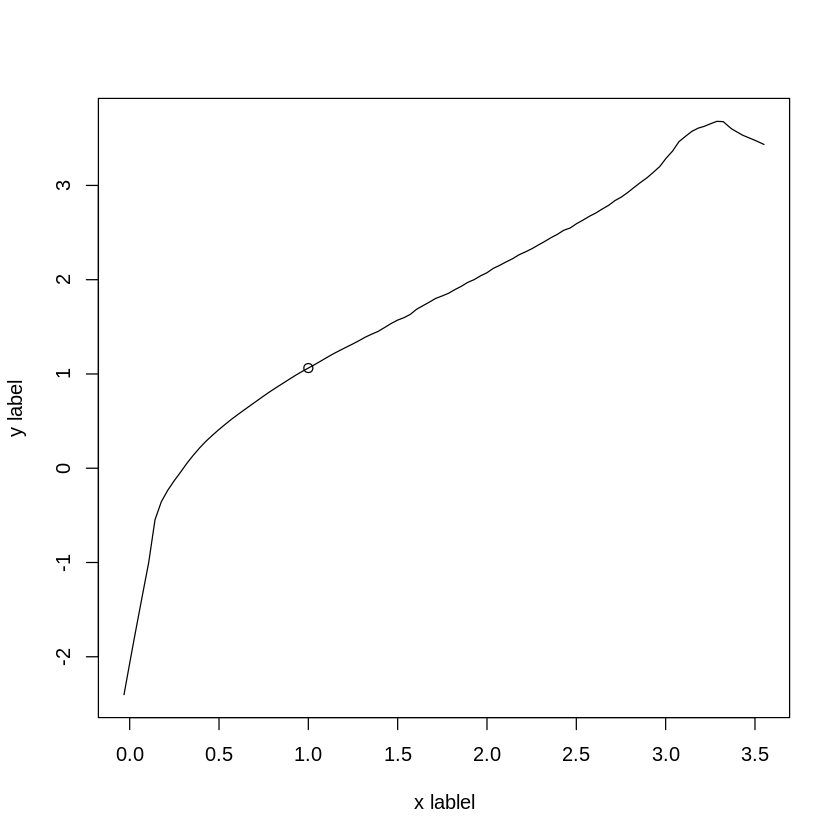

In [12]:
fit = fit_inp20x
x = 1
y = fun_predict(fit, x)

plot(NULL, xlim=range(fit$x), ylim=range(fit$y), ylab="y label", xlab="x lablel")
lines(fit)
points(x, y)

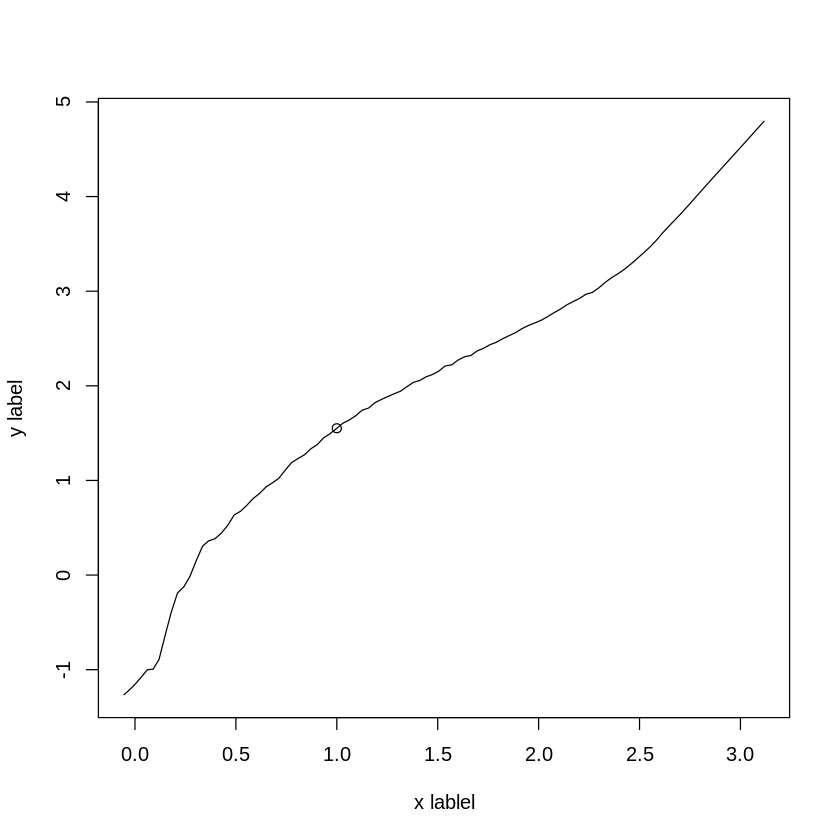

In [13]:
fit = fit_dmso
x = 1
y = fun_predict(fit, x)

plot(NULL, xlim=range(fit$x), ylim=range(fit$y), ylab="y label", xlab="x lablel")
lines(fit)
points(x, y)

## Import library size

In [14]:
fdiry = file.path(FD_RES, "source")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% 
    group_by(Group) %>% 
    mutate(Size_Group = fun(Size))

###
dat_lib = dat
print(dim(dat))
head(dat)

[1] 54  4


Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input_20x,371718546,363877945
Input1,Input,18666630,19115894
Input2_20x,Input_20x,347635732,363877945
Input2,Input,20167924,19115894
Input3_20x,Input_20x,349994051,363877945
Input3,Input,23280988,19115894


In [15]:
dat = dat_lib
dat = dat %>% dplyr::filter(str_detect(Sample, "_20x|DMSO"))
dat

Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input_20x,371718546,363877945
Input2_20x,Input_20x,347635732,363877945
Input3_20x,Input_20x,349994051,363877945
Input4_20x,Input_20x,413508358,363877945
Input5_20x,Input_20x,341110487,363877945
TFX2_DMSO,TFX_DMSO,43844606,32013519
TFX3_DMSO,TFX_DMSO,26819569,32013519
TFX4_DMSO,TFX_DMSO,30951533,32013519
TFX5_DMSO,TFX_DMSO,28859151,32013519


In [64]:
LIBSIZE_INP20X = 363877945
LIBSIZE_TFX_DMSO   = 32013519

## Import data

In [17]:
###
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")
fname = "dat_mu_var.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)

###
dat_mu_var = dat
print(dim(dat))
head(dat)

[1] 2911211      10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,69200,70200,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69300,70300,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69400,70400,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69500,70500,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69600,70600,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA
chr17,69700,70700,TFX_Dex,0.02363494,NA,NA,0.8602086,NA,NA


**`Chr17:8,148,000-8,160,000`**

In [18]:
###
loc1 = 8148000
loc2 = 8160000

###
dat = dat_mu_var
dat = dat %>% dplyr::filter(Start >= loc1, End <= loc2)

###
dat_mu_var_per1 = dat
print(dim(dat))
head(dat)

[1] 444  10


Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8149000,Input,1.438782,0.06613895,0.2571749,27.50360,24.16832,4.916129
chr17,8148000,8149000,Input_20x,2.086480,0.02407543,0.1551626,759.22407,3187.75967,56.460249
chr17,8148000,8149000,TFX_Dex,1.746624,0.39802951,0.6308958,63.56949,527.24691,22.961858
chr17,8148000,8149000,TFX_DMSO,2.620582,0.51810780,0.7197971,83.89405,530.99077,23.043237
chr17,8148100,8149100,Input,1.531727,0.07160181,0.2675851,29.28033,26.16455,5.115129
chr17,8148100,8149100,Input_20x,2.116310,0.03109287,0.1763317,770.07860,4116.91796,64.163213


In [86]:
dat_inp  = dat_mu_var_per1 %>% dplyr::filter(Group == "Input_20x")
dat_dmso = dat_mu_var_per1 %>% dplyr::filter(Group == "TFX_DMSO")

x = dat_inp$Cpm_Mean * LIBSIZE_TFX_DMSO / 10^6

print(range(dat_inp$Cnt_Mean))
print(range(dat_dmso$Cnt_Mean))
print(range(x))

[1]  314.6158 1298.6585
[1]  11.26254 247.50388
[1]  27.6795 114.2543


In [20]:
head(dat_inp)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8149000,Input_20x,2.086480,0.02407543,0.1551626,759.2241,3187.760,56.46025
chr17,8148100,8149100,Input_20x,2.116310,0.03109287,0.1763317,770.0786,4116.918,64.16321
chr17,8148200,8149200,Input_20x,2.221834,0.02262202,0.1504062,808.4764,2995.318,54.72949
chr17,8148300,8149300,Input_20x,2.232609,0.01880972,0.1371485,812.3972,2490.542,49.90533
chr17,8148400,8149400,Input_20x,2.280630,0.01380086,0.1174771,829.8709,1827.333,42.74731
chr17,8148500,8149500,Input_20x,2.135200,0.01100842,0.1049210,776.9522,1457.594,38.17845


In [21]:
head(dat_dmso)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8149000,TFX_DMSO,2.620582,0.5181078,0.7197971,83.89405,530.9908,23.04324
chr17,8148100,8149100,TFX_DMSO,2.542617,0.6910279,0.8312809,81.39812,708.2106,26.61223
chr17,8148200,8149200,TFX_DMSO,2.698205,0.6216890,0.7884726,86.37905,637.1475,25.24178
chr17,8148300,8149300,TFX_DMSO,2.826829,0.5246484,0.7243261,90.49675,537.6940,23.18823
chr17,8148400,8149400,TFX_DMSO,2.905786,0.8323483,0.9123312,93.02443,853.0450,29.20693
chr17,8148500,8149500,TFX_DMSO,2.770231,0.8622622,0.9285807,88.68485,883.7027,29.72714


## simulation

**Test**

In [75]:
set.seed(123)
mat  = replicate(1000, fun_rnegbin(n=rep(1, 10), mu=1:10, sigma2=11:20))
mu   = round(apply(mat, 1, mean), 2) 
sig2 = round(apply(mat, 1, var), 2)

print(dim(mat))
print(mu)
print(sig2)

[1]   10 1000
 [1]  0.88  1.89  3.01  3.92  4.86  5.90  7.05  8.00  9.00 10.05
 [1] 10.81  9.32 13.77 14.60 13.17 14.65 16.18 19.68 18.84 19.90


**Simulate**

In [76]:
dat = dat_inp
head(dat)

Chrom,Start,End,Group,Cpm_Mean,Cpm_Var,Cpm_Std,Cnt_Mean,Cnt_Var,Cnt_Std
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8149000,Input_20x,2.086480,0.02407543,0.1551626,759.2241,3187.760,56.46025
chr17,8148100,8149100,Input_20x,2.116310,0.03109287,0.1763317,770.0786,4116.918,64.16321
chr17,8148200,8149200,Input_20x,2.221834,0.02262202,0.1504062,808.4764,2995.318,54.72949
chr17,8148300,8149300,Input_20x,2.232609,0.01880972,0.1371485,812.3972,2490.542,49.90533
chr17,8148400,8149400,Input_20x,2.280630,0.01380086,0.1174771,829.8709,1827.333,42.74731
chr17,8148500,8149500,Input_20x,2.135200,0.01100842,0.1049210,776.9522,1457.594,38.17845


In [91]:
dat = dat_inp
dat = dat %>% dplyr::select(Chrom, Start, End, Cpm_Mean)

dat = dat %>% mutate(
    Cnt_Inp20x   = Cpm_Mean * LIBSIZE_INP20X   / 10^6,
    Cnt_TFX_DMSO = Cpm_Mean * LIBSIZE_TFX_DMSO / 10^6)
dat  = dat %>% mutate(
    Sig2_Inp20x   = get_var(fit_inp20x, Cnt_Inp20x),
    Sig2_TFX_DMSO = get_var(fit_dmso,   Cnt_TFX_DMSO)
)

print(dim(dat))
print(range(dat$Sig2_Inp20x))
print(range(dat$Sig2_TFX_DMSO))
head(dat)

[1] 111   8
[1]  388.9521 3346.6336
[1] 124.3735 560.5057


Chrom,Start,End,Cpm_Mean,Cnt_Inp20x,Cnt_TFX_DMSO,Sig2_Inp20x,Sig2_TFX_DMSO
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8149000,2.086480,759.2241,66.79557,1149.364,316.7626
chr17,8148100,8149100,2.116310,770.0786,67.75054,1171.844,321.4518
chr17,8148200,8149200,2.221834,808.4764,71.12873,1261.726,338.0587
chr17,8148300,8149300,2.232609,812.3972,71.47368,1271.735,339.7560
chr17,8148400,8149400,2.280630,829.8709,73.01099,1316.715,346.9782
chr17,8148500,8149500,2.135200,776.9522,68.35527,1186.139,324.4226


In [96]:
tmp  = dat %>% dplyr::select(Chrom, Start, End)
mu   = dat$Cnt_Inp20x
sig2 = dat$Sig2_Inp20x

set.seed(123)
n    = 10
mat  = replicate(n, fun_rnegbin(n=rep(1, length(mu)), mu=mu, sigma2=sig2))
colnames(mat) = paste0("Cnt_Sim_", 1:n)

dat_sim_inp  = bind_cols(tmp, mat)
print(dim(dat_sim_inp))
head(dat_sim_inp)

[1] 111  13


Chrom,Start,End,Cnt_Sim_1,Cnt_Sim_2,Cnt_Sim_3,Cnt_Sim_4,Cnt_Sim_5,Cnt_Sim_6,Cnt_Sim_7,Cnt_Sim_8,Cnt_Sim_9,Cnt_Sim_10
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr17,8148000,8149000,765,771,733,674,774,747,725,737,802,772
chr17,8148100,8149100,791,742,761,757,767,709,797,752,782,761
chr17,8148200,8149200,792,816,836,823,809,837,787,805,783,866
chr17,8148300,8149300,807,780,791,792,764,921,818,802,770,839
chr17,8148400,8149400,860,847,785,789,789,803,850,790,802,807
chr17,8148500,8149500,741,751,779,801,771,729,802,767,802,756
